## Training a logistic regression model for 2D data with pytorch

In this example, we define a logistic regression model for classifying 2-dimensional vectors to two classes.

Let's first load our data from csv files.

In [1]:
import numpy as np

# Load data

X = np.loadtxt("X.csv", delimiter = ",").astype(np.float32)
y = np.loadtxt("y.csv", delimiter = ",").astype(np.float32)
y[y == -1] = 0

The next step is to define our classification model. We use the torch Module and redefine the forward step consisting of a linear projection (2D -> 1D; no bias term) followed by logistic sigmoid.

In [2]:
import torch

# Define our model (logistic regression)

class LogReg(torch.nn.Module):

    def __init__(self):
        
        super(LogReg, self).__init__()
        
        # Define network components
        self.projection = torch.nn.Linear(2, 1, bias = False) # From 2d to 1d
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # Define the full pipeline
        
        y = self.projection(x)
        y = self.activation(y)
        
        return y

Now we are ready to train the logreg model. We need to cast our numpy data to a torch tensor and initialize the weights to zero (for reproducibility).

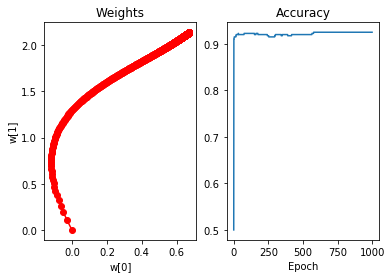

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize the model and inputs

model = LogReg()
input  = torch.from_numpy(X)
target = torch.from_numpy(y)
model.projection.weight.data.fill_(0.0)

# Define loss function. (Binary) cross entropy loss is another name for logistic loss.

loss_function = torch.nn.BCELoss()

weight_history = [[0, 0]]
acc_history    = []

for _ in range(1000):

    # Feed all samples
    y_pred = model(input)
    y_true = target.view(-1,1)

    # Compute loss...
    loss = loss_function(y_pred, y_true)
    
    # ...and gradient
    model.zero_grad()
    loss.backward()

    # Apply the gradient step to all parameters
    learning_rate = 0.1
    for p in model.parameters():

        p.data -= p.grad.data * learning_rate

    weight_history.append(model.projection.weight.detach().numpy().ravel().copy())
    
    # Compute the classification accuracy
    y_pred = y_pred.detach().numpy()
    
    accuracy = accuracy_score(np.round(y_pred), y_true)
    acc_history.append(accuracy)
    
weight_history = np.array(weight_history)

fig, ax = plt.subplots(1, 2)
ax[0].plot(weight_history[:, 0], weight_history[:, 1], 'ro-')    
ax[0].set_title("Weights")
ax[0].set_xlabel("w[0]")
ax[0].set_ylabel("w[1]")

ax[1].plot(acc_history)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")

plt.show()